In [261]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

data_path = "../main_data/locale_specific_data/"


### I. Explore Bloomington Data

In [262]:
bloom = pd.read_csv(data_path + 'BloomingtonData.csv')

In [263]:
bloom.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,...,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
0,15801,11/28/2009 12:00:00 AM,Moving,False,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,...,05/13/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
1,15932,12/08/2009 12:00:00 AM,Moving,False,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,...,04/24/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
2,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,04/15/2017 12:00:00 AM,Adoption,False,02/28/2020 12:00:00 AM,Stray,NaN,Died in care,False,False,False
3,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,02/29/2020 12:00:00 AM,Reclaimed,False,11/06/2023 12:00:00 AM,Stray,NaN,Died in care,False,False,False
4,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,12/17/2023 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False


In [264]:
bloom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34130 entries, 0 to 34129
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                34130 non-null  int64 
 1   intakedate        34130 non-null  object
 2   intakereason      34128 non-null  object
 3   istransfer        34130 non-null  bool  
 4   sheltercode       34130 non-null  object
 5   identichipnumber  29986 non-null  object
 6   animalname        34130 non-null  object
 7   breedname         34058 non-null  object
 8   basecolour        34130 non-null  object
 9   speciesname       34130 non-null  object
 10  animalage         34130 non-null  object
 11  sexname           34130 non-null  object
 12  location          34130 non-null  object
 13  movementdate      28506 non-null  object
 14  movementtype      28506 non-null  object
 15  istrial           34130 non-null  bool  
 16  returndate        10490 non-null  object
 17  returnedreas

In [265]:
bloom_df = bloom.copy()[bloom.speciesname=="Dog"].drop_duplicates()

bloom_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11100 entries, 1 to 34128
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11100 non-null  int64 
 1   intakedate        11100 non-null  object
 2   intakereason      11100 non-null  object
 3   istransfer        11100 non-null  bool  
 4   sheltercode       11100 non-null  object
 5   identichipnumber  9768 non-null   object
 6   animalname        11100 non-null  object
 7   breedname         11099 non-null  object
 8   basecolour        11100 non-null  object
 9   speciesname       11100 non-null  object
 10  animalage         11100 non-null  object
 11  sexname           11100 non-null  object
 12  location          11100 non-null  object
 13  movementdate      10088 non-null  object
 14  movementtype      10088 non-null  object
 15  istrial           11100 non-null  bool  
 16  returndate        3612 non-null   object
 17  returnedreason   

In [266]:
bloom_df[~bloom_df.movementtype.isnull()].deceasedreason.value_counts()

deceasedreason
Court Order/ Legal                       9517
Died in care                              277
UU-untreatable, unmanageable Behavior      89
UU - untreatable, unmanageable health      58
Owner Requested                            51
Dead On Arrival                            37
TM - Treatable Manageable Behavior         19
Biting                                     16
Temperament/Behavior                       11
Vet advised euthanasia                      4
TR-Treatable rehabilitable Behavior         3
Medical                                     2
Died in community                           2
Healthy                                     1
TM-Treatable Manageable Health              1
Name: count, dtype: int64

In [267]:
bloom_df[~bloom_df.movementtype.isnull()].movementtype.value_counts()

movementtype
Adoption     5363
Reclaimed    2814
Foster       1764
Transfer      140
Escaped         5
Stolen          2
Name: count, dtype: int64

In [268]:
bloom_df[(~bloom_df.movementtype.isnull()) 
         & (~bloom_df.deceaseddate.isnull())].head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,...,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
76,47613,03/10/2017 12:00:00 AM,Abandoned,False,D17031620,981020021074093,Little Dude,Beagle,Tricolour,Dog,...,04/02/2017 12:00:00 AM,Adoption,False,09/05/2017 12:00:00 AM,Stray,06/09/2021 12:00:00 AM,Dead On Arrival,False,False,True
77,47613,03/10/2017 12:00:00 AM,Abandoned,False,D17031620,981020021074093,Little Dude,Beagle,Tricolour,Dog,...,09/05/2017 12:00:00 AM,Reclaimed,False,09/05/2017 12:00:00 AM,Incompatible with owner lifestyle,06/09/2021 12:00:00 AM,Dead On Arrival,False,False,True
78,47613,03/10/2017 12:00:00 AM,Abandoned,False,D17031620,981020021074093,Little Dude,Beagle,Tricolour,Dog,...,09/06/2017 12:00:00 AM,Adoption,False,06/09/2021 12:00:00 AM,DOA,06/09/2021 12:00:00 AM,Dead On Arrival,False,False,True
170,47742,03/25/2017 12:00:00 AM,Abandoned,False,D17031749,981020021053540,Snickers,Mastiff/Mix,Tan,Dog,...,04/17/2017 12:00:00 AM,Adoption,False,NaN,Stray,04/29/2017 12:00:00 AM,"UU - untreatable, unmanageable health",True,False,False
205,47760,03/27/2017 12:00:00 AM,Abandoned,False,D17031767,981020021049797,Maverick,German Shepherd Dog,Ruddy,Dog,...,04/02/2017 12:00:00 AM,Adoption,False,NaN,Stray,12/25/2021 12:00:00 AM,Died in care,True,False,False


In [269]:
bloom[bloom.id == 72299].movementtype.value_counts()

movementtype
Adoption    5
Name: count, dtype: int64

In [270]:
bloom[bloom.id == 72299].returnedreason.value_counts()

returnedreason
Stray                             38
Return adopt - lifestyle issue     2
Owner Deceased                     1
Return Adopt - Behavior            1
Name: count, dtype: int64

In [271]:
del bloom, bloom_df

### II. Exlore non-cleaned Sonoma data

In [220]:
df = pd.read_csv(data_path + 'SonomaCountyData.csv')

df.head(5)

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,ATHENA,OTHER,RABBIT SH,BLACK,Spayed,SMALL,8/16/2010,K13-005008,SMA,A295655,...,OVER THE COUNTER,ADOPTION,INTERNET,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95472.0,"95472(38.4007555, -122.8277055)",1
1,ZIGGY,CAT,DOMESTIC SH,ORG TABBY/WHITE,Spayed,SMALL,8/28/2007,K13-005041,WESTFARM,A295782,...,OVER THE COUNTER,ADOPTION,WESTFARM,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95472.0,"95472(38.4007555, -122.8277055)",1
2,*ALICE,DOG,PIT BULL,GRAY/WHITE,Spayed,MED,9/3/2012,K13-005161,DA38,A296009,...,VET_HOSP,EUTHANIZE,BEH SEVERE,HEALTHY,UNTREATABLE,COUNTY,NaN,NaN,NaN,1
3,NALA,CAT,DOMESTIC SH,CALICO,Spayed,SMALL,3/27/2007,K13-005202,LOBBY,A296108,...,OVER THE COUNTER,ADOPTION,WALKIN,TREATABLE/REHAB,HEALTHY,SANTA ROSA,SANTA ROSA,95409.0,"95409(38.46382, -122.67058)",1
4,KHLOE,DOG,PIT BULL,BLUE/WHITE,Spayed,MED,10/9/2012,K13-005378,DA11,A294143,...,FIELD,EUTHANIZE,BEH SEVERE,HEALTHY,UNTREATABLE,COUNTY,SANTA ROSA,95403.0,"95403(38.4716444, -122.7398255)",1


In [221]:
dog_df = df[df.Type=="DOG"].drop_duplicates()

dog_df.head(5)

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
2,*ALICE,DOG,PIT BULL,GRAY/WHITE,Spayed,MED,9/3/2012,K13-005161,DA38,A296009,...,VET_HOSP,EUTHANIZE,BEH SEVERE,HEALTHY,UNTREATABLE,COUNTY,NaN,NaN,NaN,1
4,KHLOE,DOG,PIT BULL,BLUE/WHITE,Spayed,MED,10/9/2012,K13-005378,DA11,A294143,...,FIELD,EUTHANIZE,BEH SEVERE,HEALTHY,UNTREATABLE,COUNTY,SANTA ROSA,95403.0,"95403(38.4716444, -122.7398255)",1
5,LOKI,DOG,CAROLINA DOG/MIX,GOLD/WHITE,Male,MED,9/7/2007,K13-005670,DI100,A281788,...,FIELD,EUTHANIZE,BEH SEVERE,UNTREATABLE,UNTREATABLE,SANTA ROSA,*COTATI,94931.0,"94931(38.3260186, -122.706422)",1
6,HANK,DOG,CHIHUAHUA SH,TAN,Neutered,TOY,10/1/2007,K13-005875,DS96,A297574,...,OVER THE COUNTER,EUTHANIZE,AGGRESSIVE,TREATABLE/MANAGEABLE,TREATABLE/MANAGEABLE,*WINDSOR,NaN,NaN,NaN,1
7,*BINGO,DOG,PIT BULL,TAN/WHITE,Neutered,MED,10/29/2012,K13-006036,DA39,A298002,...,OVER THE COUNTER,ADOPTION,WALKIN,HEALTHY,HEALTHY,COUNTY,*HEALDSBURG,95448.0,"95448(38.613965, -122.869825)",1


In [222]:
dog_df['Animal ID'].value_counts()

Animal ID
A322298    19
A406399    15
A345466    11
A362029    11
A299415     9
           ..
A342225     1
A298049     1
A297355     1
A344798     1
A426434     1
Name: count, Length: 13257, dtype: int64

In [223]:
dog_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15688 entries, 2 to 27831
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  13945 non-null  object 
 1   Type                  15688 non-null  object 
 2   Breed                 15688 non-null  object 
 3   Color                 15688 non-null  object 
 4   Sex                   15688 non-null  object 
 5   Size                  15654 non-null  object 
 6   Date Of Birth         12991 non-null  object 
 7   Impound Number        15688 non-null  object 
 8   Kennel Number         15683 non-null  object 
 9   Animal ID             15688 non-null  object 
 10  Intake Date           15688 non-null  object 
 11  Outcome Date          15532 non-null  object 
 12  Days in Shelter       15688 non-null  int64  
 13  Intake Type           15688 non-null  object 
 14  Intake Subtype        15688 non-null  object 
 15  Outcome Type          15

In [224]:
dog_df.columns

Index(['Name', 'Type', 'Breed', 'Color', 'Sex', 'Size', 'Date Of Birth',
       'Impound Number', 'Kennel Number', 'Animal ID', 'Intake Date',
       'Outcome Date', 'Days in Shelter', 'Intake Type', 'Intake Subtype',
       'Outcome Type', 'Outcome Subtype', 'Intake Condition',
       'Outcome Condition', 'Intake Jurisdiction', 'Outcome Jurisdiction',
       'Outcome Zip Code', 'Location', 'Count'],
      dtype='object')

In [225]:
dog_df['Intake Type'].value_counts()

Intake Type
STRAY              11378
CONFISCATE          1776
OWNER SURRENDER     1475
QUARANTINE           466
ADOPTION RETURN      328
TRANSFER             259
BORN HERE              6
Name: count, dtype: int64

In [226]:
dog_df['Intake Subtype'].value_counts()

Intake Subtype
FIELD                               8004
OVER THE COUNTER                    4302
FLD_ARREST                           958
VET_HOSP                             437
FLD_STRAY                            336
FLD_HOSPTL                           331
PRIV_SHELT                           263
PHONE                                238
FLD_CRUEL                            161
FIELD_RETURN TO OWNER                 99
FLD_CORONR                            98
FLD_EVICT                             76
FIELD_OS                              72
MUN_SHELT                             69
BORN_HERE                             60
FLD_ABAND                             58
OVER THE COUNTER_OS                   28
OVER THE COUNTER_RETURN TO OWNER      14
FLD_INVEST                            12
OVER THE COUNTER_ARREST               11
FLD_LIVSTK                            11
FLD_OWNED                              8
RESCUE_GRP                             7
OVER THE COUNTER_OWNED                 6
F

In [227]:
dog_df['Outcome Type'].value_counts()

Outcome Type
RETURN TO OWNER    7806
ADOPTION           3615
TRANSFER           2259
EUTHANIZE          1729
RTOS                 45
DISPOSAL             36
DIED                 35
ESCAPED/STOLEN        5
VET                   1
Name: count, dtype: int64

In [228]:
dog_df['Outcome Subtype'].value_counts()

Outcome Subtype
OVER THE COUNTER_WEB     1865
WALKIN                   1575
OVER THE COUNTER_PRVS    1334
AGGRESSIVE               1131
OVER THE COUNTER_CALL     903
                         ... 
NIKO RESCU                  1
GT DANE                     1
LASCR                       1
ILL MINOR                   1
SUNSHINE                    1
Name: count, Length: 202, dtype: int64

In [229]:
dog_df['Animal ID'].value_counts()

Animal ID
A322298    19
A406399    15
A345466    11
A362029    11
A299415     9
           ..
A342225     1
A298049     1
A297355     1
A344798     1
A426434     1
Name: count, Length: 13257, dtype: int64

In [230]:
dog_df[dog_df['Animal ID']=='A322298'].loc[4481]

Name                                            LAYLA
Type                                              DOG
Breed                              FRENCH BULLDOG/MIX
Color                                     BROWN/WHITE
Sex                                            Spayed
Size                                            SMALL
Date Of Birth                               5/21/2013
Impound Number                             K15-014076
Kennel Number                                    DS75
Animal ID                                     A322298
Intake Date                                 5/21/2015
Outcome Date                                5/26/2015
Days in Shelter                                     5
Intake Type                                CONFISCATE
Intake Subtype                             FLD_ARREST
Outcome Type                          RETURN TO OWNER
Outcome Subtype               OVER THE COUNTER_WALKIN
Intake Condition                              HEALTHY
Outcome Condition           

In [231]:
dog_df[dog_df['Animal ID']=='A322298']['Intake Type'].value_counts()

Intake Type
CONFISCATE    19
Name: count, dtype: int64

In [232]:
dog_df.drop(['Type','Impound Number','Kennel Number',
             'Intake Jurisdiction', 'Outcome Jurisdiction',
             'Outcome Zip Code','Location','Count'], axis=1, inplace=True)


In [233]:
dog_df

,Name,Breed,Color,Sex,Size,Date Of Birth,Animal ID,Intake Date,Outcome Date,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition
2,*ALICE,PIT BULL,GRAY/WHITE,Spayed,MED,9/3/2012,A296009,8/22/2013,4/14/2014,235,TRANSFER,VET_HOSP,EUTHANIZE,BEH SEVERE,HEALTHY,UNTREATABLE
4,KHLOE,PIT BULL,BLUE/WHITE,Spayed,MED,10/9/2012,A294143,8/31/2013,4/14/2014,226,STRAY,FIELD,EUTHANIZE,BEH SEVERE,HEALTHY,UNTREATABLE
5,LOKI,CAROLINA DOG/MIX,GOLD/WHITE,Male,MED,9/7/2007,A281788,9/19/2013,7/30/2014,314,STRAY,FIELD,EUTHANIZE,BEH SEVERE,UNTREATABLE,UNTREATABLE
6,HANK,CHIHUAHUA SH,TAN,Neutered,TOY,10/1/2007,A297574,10/1/2013,1/1/2014,92,OWNER SURRENDER,OVER THE COUNTER,EUTHANIZE,AGGRESSIVE,TREATABLE/MANAGEABLE,TREATABLE/MANAGEABLE
7,*BINGO,PIT BULL,TAN/WHITE,Neutered,MED,10/29/2012,A298002,10/8/2013,5/22/2014,226,STRAY,OVER THE COUNTER,ADOPTION,WALKIN,HEALTHY,HEALTHY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27824,NaN,PIT BULL/RAT TERRIER,TRICOLOR,Male,MED,11/15/2022,A426433,5/15/2024,NaN,0,STRAY,OVER THE COUNTER,NaN,NaN,UNKNOWN,NaN
27825,NaN,PIT BULL/MIX,TAN/WHITE,Female,MED,NaN,A426418,5/15/2024,NaN,0,CONFISCATE,FLD_HOSPTL,NaN,NaN,UNKNOWN,NaN
27829,NaN,GERM SHEPHERD/MIX,CREAM,Male,LARGE,5/15/2022,A426454,5/15/2024,NaN,0,STRAY,OVER THE COUNTER,NaN,NaN,UNKNOWN,NaN
27830,CRUZ,GERM SHEPHERD/SIBERIAN HUSKY,TAN/BLACK,Neutered,MED,NaN,A426436,5/15/2024,5/15/2024,0,OWNER SURRENDER,OVER THE COUNTER,RETURN TO OWNER,OVER THE COUNTER_NOTICE,UNKNOWN,PENDING


In [234]:
dog_df[dog_df['Days in Shelter']==0]["Intake Subtype"].value_counts()

Intake Subtype
FIELD                      1930
OVER THE COUNTER            533
FLD_ARREST                  107
FLD_STRAY                    75
VET_HOSP                     74
FLD_CRUEL                    49
PHONE                        39
FLD_HOSPTL                   37
PRIV_SHELT                   23
FLD_EVICT                    18
BORN_HERE                    10
FLD_CORONR                    6
FIELD_OS                      5
MUN_SHELT                     5
FLD_ABAND                     5
EMAIL                         3
OVER THE COUNTER_ARREST       1
FLD_OWNED                     1
FIELD_RETURN TO OWNER         1
Name: count, dtype: int64

In [235]:
dog_df[dog_df['Days in Shelter']==1]["Outcome Subtype"].value_counts()

Outcome Subtype
OVER THE COUNTER_WEB       673
OVER THE COUNTER_PRVS      330
OVER THE COUNTER_CALL      272
OVER THE COUNTER_MCHIP     236
OVER THE COUNTER_WALKIN    167
OVER THE COUNTER_ARREST    101
RETURN TO OWNER             94
OVER THE COUNTER_NOTICE     74
FLD_PRVS                    37
FLD_MCHIP                   17
OVER THE COUNTER_IDTAG      17
ILL SEVERE                  12
DOGWOOD                     11
FB OTHER                    10
AGGRESSIVE                  10
MEDICAL                      8
WALKIN                       8
INTERNET                     7
OVER THE COUNTER_LIC         7
FB SCAS                      6
SCAS WEB                     6
FLD_IDTAG                    6
INJ SEVERE                   6
OVER THE COUNTER_LETTER      6
HSSC                         5
ARF                          3
FLD_LIC                      3
RP SHELTER                   3
DOA                          3
SOVER THE COUNTER            3
FLD_NBR                      3
CON SEVERE             

In [236]:
dog_df = dog_df[dog_df['Days in Shelter'] > 1]

dog_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10595 entries, 2 to 27778
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               9154 non-null   object
 1   Breed              10595 non-null  object
 2   Color              10595 non-null  object
 3   Sex                10595 non-null  object
 4   Size               10581 non-null  object
 5   Date Of Birth      8976 non-null   object
 6   Animal ID          10595 non-null  object
 7   Intake Date        10595 non-null  object
 8   Outcome Date       10595 non-null  object
 9   Days in Shelter    10595 non-null  int64 
 10  Intake Type        10595 non-null  object
 11  Intake Subtype     10595 non-null  object
 12  Outcome Type       10594 non-null  object
 13  Outcome Subtype    10517 non-null  object
 14  Intake Condition   10595 non-null  object
 15  Outcome Condition  10572 non-null  object
dtypes: int64(1), object(15)
memory usage: 1.4+ MB

In [237]:
dog_df[dog_df['Animal ID']=='A322298']

,Name,Breed,Color,Sex,Size,Date Of Birth,Animal ID,Intake Date,Outcome Date,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition
4481,LAYLA,FRENCH BULLDOG/MIX,BROWN/WHITE,Spayed,SMALL,5/21/2013,A322298,5/21/2015,5/26/2015,5,CONFISCATE,FLD_ARREST,RETURN TO OWNER,OVER THE COUNTER_WALKIN,HEALTHY,HEALTHY
9563,LAYLA,FRENCH BULLDOG/MIX,BROWN/WHITE,Spayed,SMALL,5/21/2013,A322298,12/1/2016,12/6/2016,5,CONFISCATE,FLD_ARREST,RETURN TO OWNER,OVER THE COUNTER_PRVS,HEALTHY,HEALTHY
9917,LAYLA,FRENCH BULLDOG/MIX,BROWN/WHITE,Spayed,SMALL,5/21/2013,A322298,1/19/2017,1/26/2017,7,CONFISCATE,FLD_ARREST,RETURN TO OWNER,OVER THE COUNTER_PRVS,HEALTHY,HEALTHY
10062,LAYLA,FRENCH BULLDOG/MIX,BROWN/WHITE,Spayed,SMALL,5/21/2013,A322298,2/10/2017,2/15/2017,5,CONFISCATE,FLD_ARREST,RETURN TO OWNER,FLD_PRVS,HEALTHY,HEALTHY
10514,LAYLA,FRENCH BULLDOG/MIX,BROWN/WHITE,Spayed,SMALL,5/21/2013,A322298,4/18/2017,4/20/2017,2,CONFISCATE,FLD_ARREST,RETURN TO OWNER,FLD_PRVS,HEALTHY,HEALTHY
10568,LAYLA,FRENCH BULLDOG/MIX,BROWN/WHITE,Spayed,SMALL,5/21/2013,A322298,4/23/2017,4/26/2017,3,CONFISCATE,FLD_ARREST,RETURN TO OWNER,OVER THE COUNTER_PRVS,HEALTHY,HEALTHY
16571,LAYLA,FRENCH BULLDOG/MIX,BROWN/WHITE,Spayed,SMALL,5/21/2013,A322298,3/31/2019,4/3/2019,3,CONFISCATE,FLD_HOSPTL,RETURN TO OWNER,OVER THE COUNTER_NOTICE,UNKNOWN,PENDING
16737,LAYLA,FRENCH BULLDOG/MIX,BROWN/WHITE,Spayed,SMALL,5/21/2013,A322298,4/25/2019,4/30/2019,5,CONFISCATE,FLD_HOSPTL,RETURN TO OWNER,OVER THE COUNTER_PRVS,UNKNOWN,PENDING
17373,LAYLA,FRENCH BULLDOG/MIX,BROWN/WHITE,Spayed,SMALL,5/21/2013,A322298,7/6/2019,7/9/2019,3,CONFISCATE,FLD_HOSPTL,RETURN TO OWNER,OVER THE COUNTER_PRVS,UNKNOWN,HEALTHY
17934,LAYLA,FRENCH BULLDOG/MIX,BROWN/WHITE,Spayed,SMALL,5/21/2013,A322298,9/7/2019,9/10/2019,3,CONFISCATE,FLD_ARREST,RETURN TO OWNER,OVER THE COUNTER_PRVS,UNKNOWN,HEALTHY


In [238]:
print(dog_df["Intake Type"].value_counts())
print()
print(dog_df["Intake Subtype"].value_counts())
print()
print('#'*10)
print(dog_df["Outcome Type"].value_counts())
print()
print(dog_df["Outcome Subtype"].value_counts())
print()


Intake Type
STRAY              7098
OWNER SURRENDER    1404
CONFISCATE         1172
QUARANTINE          439
ADOPTION RETURN     280
TRANSFER            197
BORN HERE             5
Name: count, dtype: int64

Intake Subtype
FIELD                               4909
OVER THE COUNTER                    3331
FLD_ARREST                           623
VET_HOSP                             277
FLD_STRAY                            222
PRIV_SHELT                           216
FLD_HOSPTL                           211
PHONE                                170
FLD_CRUEL                            104
FIELD_RETURN TO OWNER                 96
FLD_CORONR                            76
FIELD_OS                              65
MUN_SHELT                             61
FLD_EVICT                             43
FLD_ABAND                             41
BORN_HERE                             40
OVER THE COUNTER_OS                   28
OVER THE COUNTER_RETURN TO OWNER      13
FLD_INVEST                            12

In [239]:
dog_adopt_df = dog_df[dog_df['Outcome Type']=="ADOPTION"].reset_index(drop=True)


In [240]:
dog_adopt_df['Animal ID'].value_counts()

Animal ID
A317728    4
A329123    4
A418990    4
A387388    3
A309143    3
          ..
A331526    1
A331552    1
A331566    1
A331567    1
A425891    1
Name: count, Length: 3321, dtype: int64

In [241]:
dog_adopt_df[dog_adopt_df['Animal ID']=='A317728']

,Name,Breed,Color,Sex,Size,Date Of Birth,Animal ID,Intake Date,Outcome Date,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition
780,*RAINBOW,PIT BULL/MIX,BLUE/WHITE,Spayed,MED,3/18/2014,A317728,3/9/2015,3/24/2015,15,STRAY,FIELD,ADOPTION,WALKIN,HEALTHY,HEALTHY
814,*RAINBOW,PIT BULL/MIX,BLUE/WHITE,Spayed,MED,3/18/2014,A317728,3/25/2015,4/4/2015,10,ADOPTION RETURN,OVER THE COUNTER,ADOPTION,WALKIN,HEALTHY,HEALTHY
900,*RAINBOW,PIT BULL/MIX,BLUE/WHITE,Spayed,MED,3/18/2014,A317728,5/16/2015,7/28/2015,73,OWNER SURRENDER,OVER THE COUNTER,ADOPTION,WALKIN,HEALTHY,HEALTHY
1010,*RAINBOW,PIT BULL/MIX,BLUE/WHITE,Spayed,MED,3/18/2014,A317728,7/28/2015,8/13/2015,16,ADOPTION RETURN,OVER THE COUNTER,ADOPTION,SPEC EVENT,HEALTHY,HEALTHY


In [242]:

features = ['Breed','Color','Sex','Size','Intake Type','Intake Condition']
outcomes = ['Days in Shelter']

of_interest = features + outcomes


In [243]:
dog_adopt_df.count()

Name                 3571
Breed                3577
Color                3577
Sex                  3577
Size                 3576
Date Of Birth        3554
Animal ID            3577
Intake Date          3577
Outcome Date         3577
Days in Shelter      3577
Intake Type          3577
Intake Subtype       3577
Outcome Type         3577
Outcome Subtype      3575
Intake Condition     3577
Outcome Condition    3577
dtype: int64

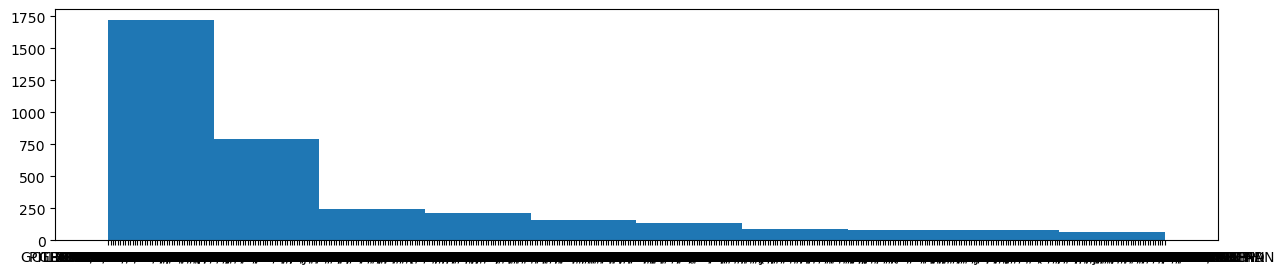

<Figure size 640x480 with 0 Axes>

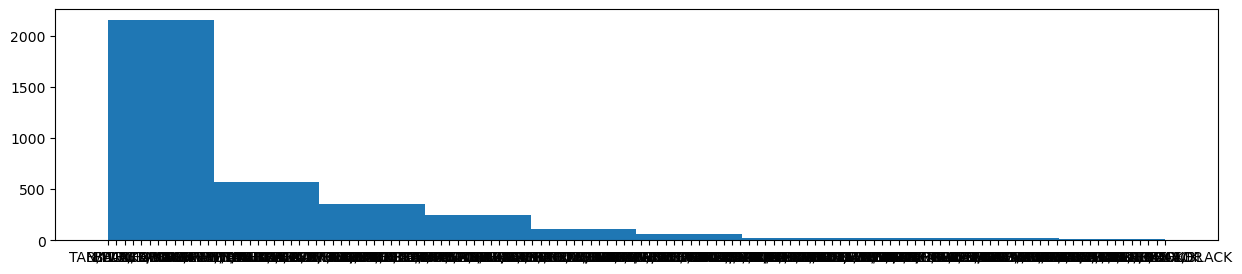

<Figure size 640x480 with 0 Axes>

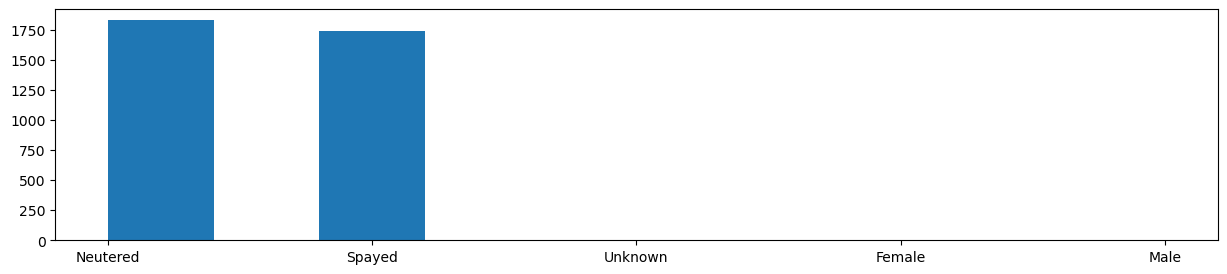

TypeError: 'value' must be an instance of str or bytes, not a float

<Figure size 640x480 with 0 Axes>

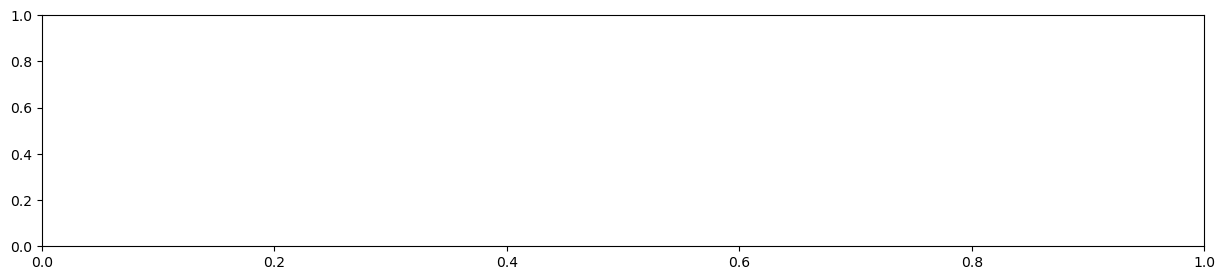

In [244]:
for PAR in of_interest:
    fig = plt.figure(figsize=(15,3))
    plt.hist(dog_adopt_df[PAR])
    plt.show()
    plt.clf()


#### With this many breeds/colors, we need to pair them down.  
 - quick search online suggests that most dogs are incorrectly labeled by shelters (who are typically guessing) though perhaps a majority get at least one breed correct, e.g. "german shepherd" label is most likely a mix but that mix probably includes german shepherd.  
   - of course, the label is perhaps the important thing to adopters?
   
 Given this:
  - combine all with a particular breed in name into one "breed"

For Colors:
  - 

For sizes:  Should X-LRG be combined with LARGE?  (total number of X-LRG is relatively small, see scatter plot below)
 
 Initial thoughts
 - ~~?AKC 7 groups (working, herding, hound, sporting, non-sporting, terrier, and toy)~~
   - however pit bull vs german shepherd should be preserved, for example
 - actually, pit bull is not officially a breed so should be combined with pit bull/mix anyway
 - combine "mixes" by group??
 - combine sh/lh chihuahua
 - most are likely not actually purebred, so perhaps mixes should be combined with their "leading" breed
 
 



In [ ]:
dog_adopt_df['Color'].value_counts()

Color
BLACK/WHITE         429
BLACK/TAN           274
TAN                 267
BLACK               226
TAN/WHITE           224
                   ... 
YELLOW/TAN            1
Y BRINDLE             1
TAN/RED               1
RED/BR BRINDLE        1
BR BRINDLE/BLACK      1
Name: count, Length: 128, dtype: int64

In [ ]:
dog_adopt_df['Color'].value_counts(ascending=True)

Color
BR BRINDLE/BLACK      1
WHITE/YELLOW          1
CHOCOLATE/RED         1
TAN/GOLD              1
RED/BR BRINDLE        1
                   ... 
TAN/WHITE           224
BLACK               226
TAN                 267
BLACK/TAN           274
BLACK/WHITE         429
Name: count, Length: 128, dtype: int64

In [ ]:
#Finding the breeds with large number of repetitions (all are with more than 10 occurences are shown)
dog_adopt_df[dog_adopt_df['Breed'].map(dog_adopt_df['Breed'].value_counts()) >10]["Breed"].value_counts()

Breed
CHIHUAHUA SH                    391
PIT BULL                        345
PIT BULL/MIX                    212
GERM SHEPHERD                   196
CHIHUAHUA SH/MIX                191
GERM SHEPHERD/MIX               130
SIBERIAN HUSKY                  106
LABRADOR RETR/MIX                99
PARSON RUSS TER/MIX              83
BORDER COLLIE/MIX                48
CAIRN TERRIER/MIX                44
LABRADOR RETR                    40
POODLE MIN                       31
GREAT PYRENEES                   29
AUST CATTLE DOG/MIX              29
DACHSHUND/MIX                    28
PARSON RUSS TER                  28
POODLE MIN/MIX                   28
SIBERIAN HUSKY/MIX               27
AUST CATTLE DOG                  27
CHIHUAHUA LH/MIX                 27
BORDER COLLIE                    25
SCHNAUZER MIN/MIX                23
CHIHUAHUA LH                     23
YORKSHIRE TERR/MIX               22
POMERANIAN/MIX                   22
AUST SHEPHERD/MIX                22
MIN PINSCHER          

In [ ]:
#Finding the colors with large number of repetitions (all are with more than 10 occurences are shown)
dog_adopt_df[dog_adopt_df['Color'].map(dog_adopt_df['Color'].value_counts()) >10]["Color"].value_counts()

Color
BLACK/WHITE         429
BLACK/TAN           274
TAN                 267
BLACK               226
TAN/WHITE           224
WHITE               223
BROWN               181
BROWN/WHITE         168
TRICOLOR            130
WHITE/BLACK         105
BLACK/BROWN          95
BR BRINDLE/WHITE     88
TAN/BLACK            88
WHITE/BROWN          86
BROWN/BLACK          73
WHITE/TAN            69
BR BRINDLE           65
RED/WHITE            58
GRAY/WHITE           53
BLUE/WHITE           48
RED                  45
GRAY                 38
FAWN                 33
WHITE/GRAY           30
YELLOW               30
BROWN/TAN            30
CREAM                27
CHOCOLATE            25
BLUE                 20
CHOCOLATE/WHITE      19
FAWN/WHITE           14
WHITE/BR BRINDLE     13
BL BRINDLE/WHITE     13
GOLD                 12
BUFF                 12
BLUE MERLE           11
RED/BLACK            11
TRICOLOR/WHITE       11
Name: count, dtype: int64

In [ ]:
dog_adopt_df['Size'].value_counts(ascending=True)

Size
X-LRG     32
TOY      398
PUPPY    577
LARGE    657
MED      940
SMALL    972
Name: count, dtype: int64

### Some Sonoma Scatter Plots

In [245]:
## Should puppy be a size??

## ordering the size category
from pandas.api.types import CategoricalDtype

size_order = CategoricalDtype(categories=["PUPPY", "TOY", "SMALL", "MED", "LARGE", "X-LRG"], ordered=True)
dog_adopt2_df = dog_adopt_df
dog_adopt2_df['Size']= dog_adopt_df['Size'].astype(size_order)

## above seems to have done what I inteded for adopt2, but it seems to have also happened for original, and I'm not sure why.

## remove extended stays

dog_adopt_1yr_df = dog_adopt_df[dog_adopt_df['Days in Shelter']< 366].reset_index(drop=True)
dog_adopt_100day_df = dog_adopt_df[dog_adopt_df['Days in Shelter']< 101].reset_index(drop=True)
dog_adopt_30day_df = dog_adopt_df[dog_adopt_df['Days in Shelter']< 31].reset_index(drop=True)
dog_adopt2_30day_df = dog_adopt2_df[dog_adopt_df['Days in Shelter']< 31].reset_index(drop=True)


# features = ['Breed','Color','Sex','Size','Intake Type','Intake Condition']
# outcomes = ['Days in Shelter']

features2 = ['Breed', 'Color','Size','Intake Type']
outcomes2 = ['Days in Shelter']

of_interest2 = features2 + outcomes2


In [246]:
dog_adopt_df['Size'].value_counts()

Size
SMALL    972
MED      940
LARGE    657
PUPPY    577
TOY      398
X-LRG     32
Name: count, dtype: int64

In [247]:
dog_adopt2_df['Size'].value_counts()

Size
SMALL    972
MED      940
LARGE    657
PUPPY    577
TOY      398
X-LRG     32
Name: count, dtype: int64

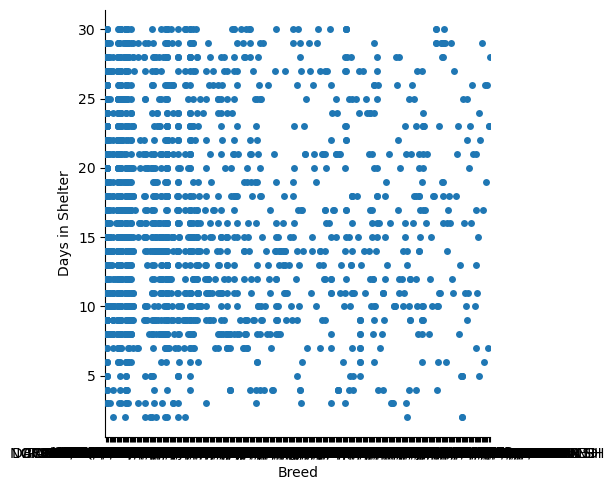

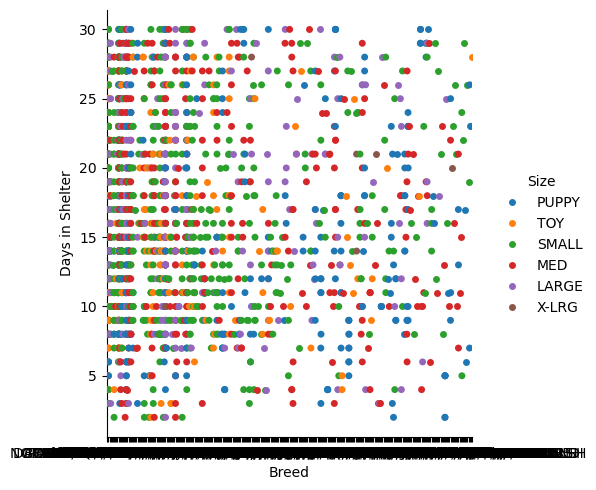

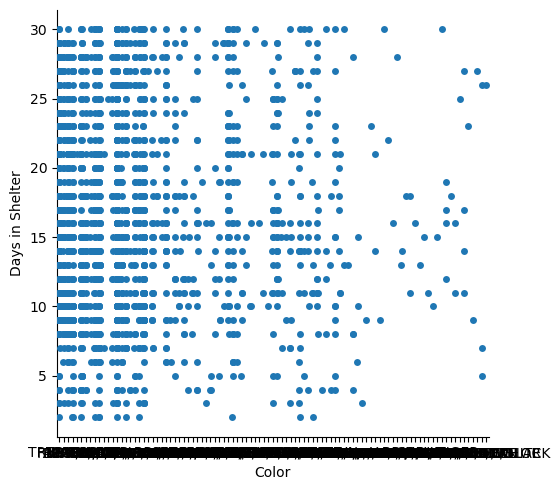

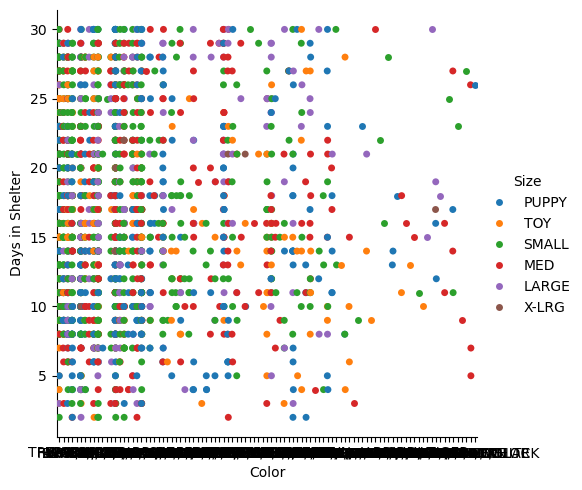

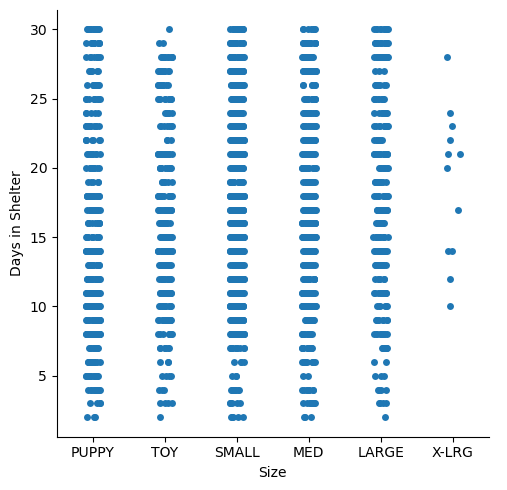

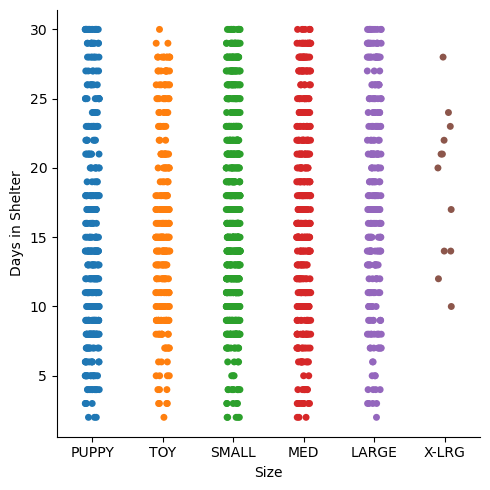

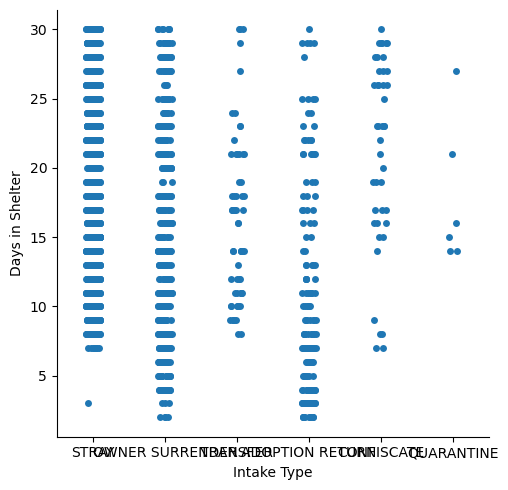

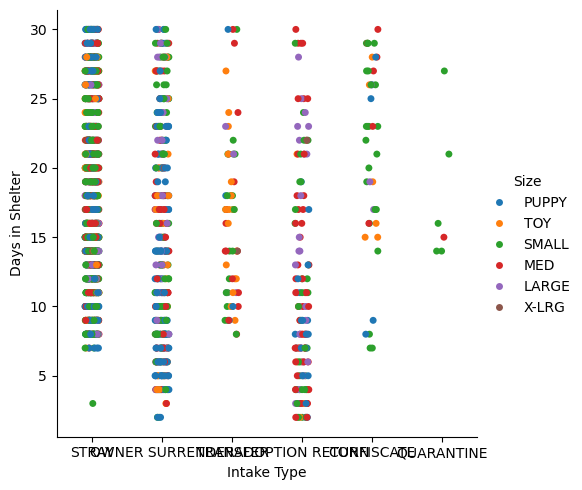

In [249]:
for PAR in features2:
    # sns.catplot(data = dog_adopt_100day_df, x = PAR, y = "Days in Shelter")
    sns.catplot(data = dog_adopt_30day_df, x = PAR, y = outcomes2[0])
    # sns.catplot(data = dog_adopt_100day_df, x = PAR, y = outcomes2[0], hue = "Size")
    sns.catplot(data = dog_adopt2_30day_df, x = PAR, y = outcomes2[0], hue = "Size")